In [20]:
import pandas as pd
import os
from pathlib import Path
df = pd.read_csv("../tos_data/tos_data.csv", error_bad_lines=False)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21278 entries, 0 to 21277
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Length     21278 non-null  int64 
 1   Link       21278 non-null  object
 2   Original   21278 non-null  object
 3   Processed  21278 non-null  object
dtypes: int64(1), object(3)
memory usage: 665.1+ KB


In [21]:
def remove_multiple_space(sentence):
    clear_sentence = ' '.join(sentence.split())
    clear_sentence = clear_sentence.lower()
    return clear_sentence

df['Original'] = df['Original'].apply(remove_multiple_space)
df['Processed'] = df['Processed'].apply(remove_multiple_space)
df

,Length,Link,Original,Processed
0,107,https://policies.google.com/terms?hl=en-US,". as a result, these terms of service help def...",result term service help define google relatio...
1,94,https://policies.google.com/terms?hl=en-US,", which describes the intellectual property ri...",describe intellectual property right content f...
2,53,https://policies.google.com/terms?hl=en-US,", which describes other legal rights you have,...",describe legal right expect case someone viola...
3,48,https://policies.google.com/terms?hl=en-US,understanding these terms is important because...,understand term important use service agree term
4,51,https://policies.google.com/terms?hl=en-US,". although it’s not part of these terms, we en...",although part term encourage read better under...
...,...,...,...,...
21273,73,https://nuacom.ie/terms-conditions/,19.1. headings are included in this gtc for co...,head include gtc convenience shall affect cons...
21274,400,https://nuacom.ie/terms-conditions/,20.1. these gtc together with any documents ex...,gtc together document expressly refer contain ...
21275,85,https://nuacom.ie/terms-conditions/,21.1. if any part of these gtc shall be found ...,part gtc shall find unlawful shall affect vali...
21276,100,https://nuacom.ie/terms-conditions/,21.2. this contract is and shall have deemed t...,contract shall deem make republic ireland shal...


In [22]:
df_sorted = df.copy()

In [23]:
df_sorted.describe(include=[object])
# unique: the number of unique sentences.
# top: the most common value.
# freq: the most common value's frequency.

,Link,Original,Processed
count,21278,21278,21278
unique,264,19914,19570
top,https://asana.com/terms,these support terms describe the packages of s...,statement good faith belief use material manne...
freq,857,10,15


In [24]:
df_sorted.describe(exclude=[object])

,Length
count,21278.000000
mean,268.914842
std,233.613154
min,32.000000
25%,116.000000
50%,194.000000
75%,340.000000
max,3971.000000


In [25]:
df_sorted = df_sorted.drop(columns=['Length', 'Processed'])
# df_temp = df_sorted[0:56]
# df_temp

In [26]:
import re
def split_sentence(sentence):
    t_list = re.split('[;.]', sentence)

    return t_list

def filter_roman_number(s):
    result = []
    for t in s:
        if re.search('\(.\)', str(t)) != None:
            result.append(list(filter(None, re.split('\(.\)', str(t).strip()))))
        elif re.search('\(..\)', str(t)) != None:
            result.append(list(filter(None, re.split('\(..\)', str(t).strip()))))
        elif re.search('\(...\)', str(t)) != None:
            result.append(list(filter(None, re.split('\(...\)', str(t).strip()))))
        elif re.search('\(....\)', str(t)) != None:
            result.append(list(filter(None, re.split('\(....\)', str(t).strip()))))
    return result

def make_new_row(plist, df_sorted_result):
    for s in plist:
        new_row = {
            'Link': row['Link'],
            'Original': s,
        }
        df_sorted_result = df_sorted_result.append(new_row, ignore_index=True)
    return df_sorted_result

df_sorted_result = pd.DataFrame(columns=['Link', 'Original'])
for i, row in df_sorted.iterrows():
    t_list = split_sentence(row['Original'])
    f_list = filter_roman_number(t_list)

    if not f_list:
        df_sorted_result = make_new_row(t_list, df_sorted_result)
    else:
        df_sorted_result = make_new_row(f_list, df_sorted_result)

df_sorted_result = df_sorted_result[df_sorted_result['Original'] != '']
df_sorted_result



,Link,Original
1,https://policies.google.com/terms?hl=en-US,"as a result, these terms of service help defi..."
2,https://policies.google.com/terms?hl=en-US,"for example, these terms include the followin..."
3,https://policies.google.com/terms?hl=en-US,", which describes the intellectual property ri..."
4,https://policies.google.com/terms?hl=en-US,", which describes other legal rights you have,..."
5,https://policies.google.com/terms?hl=en-US,understanding these terms is important because...
...,...,...
65536,https://nuacom.ie/terms-conditions/,2
65537,https://nuacom.ie/terms-conditions/,this contract is and shall have deemed to hav...
65539,https://nuacom.ie/terms-conditions/,21
65540,https://nuacom.ie/terms-conditions/,3


In [27]:
# How to parse (i), (ii), and (iii)?
#s = re.split('[;.]', "(a) if the customer shall fail to pay the contract price to the company on the due date or, if an actual person, die or be the subject of an order under the mental health act 1959, or if any distress or execution is levied upon the customer's property or assets or if the customer shall offer to make any scheme or arrangement with creditors or commit any act of bankruptcy or, being a company, has a receiver appointed for any part of its undertaking or assets or if a resolution for winding up shall be passed, then the company may treat all sums due or to become due on any delivery as immediately payable or suspend or cancel further deliveries or require payment in advance therefor or recover any products which are unsold wheresoever they are stored or treat the contract as repudiated by the customer but without prejudice to any other rights of the company")
# s = split_sentence("(i) if the customer shall (i) fail to pay the contract price to the company on the due date or (ii) if an actual person, die or be the subject of an order under the mental health act 1959, or if any distress or execution is levied upon the customer's property or assets or if the customer shall offer to make any scheme or arrangement with creditors or commit any act of bankruptcy or, being a company, has a receiver appointed for any part of its (iii) undertaking or assets or if a resolution for winding up shall be passed, then the company may treat all sums due or to become due on any delivery as immediately payable or suspend or cancel further deliveries or require payment in advance therefor or recover any products which are unsold wheresoever they are stored or treat the contract as repudiated by the customer but without prejudice to any other rights of the company")
# def filter_roman_number(s):
#     result = []
#     for t in s:
#         if re.search('\(.\)', str(t)) != None:
#             result.append(list(filter(None, re.split('\(.\)', str(t).strip()))))
#         if re.search('\(..\)', str(t)) != None:
#             result.append(list(filter(None, re.split('\(..\)', str(result).strip()))))
#         if re.search('\(...\)', str(t)) != None:
#             result.append(list(filter(None, re.split('\(...\)', str(result).strip()))))
#         if re.search('\(....\)', str(t)) != None:
#             result.append(list(filter(None, re.split('\(....\)', str(result).strip()))))
#     return result

# result = filter_roman_number(s)
# if not result:
#     print(s)
# else:
#     print(result)
#print(filter_roman_number(s))
#print(s)



In [28]:
df_sorted_result['Length'] = 0
df_sorted_result['Length'] = df_sorted_result['Original'].apply(lambda x: len(x))
df_sorted_result = df_sorted_result[['Length', 'Link', 'Original']]
#df_sorted_result = df_sorted_result.sort_values(by='Length', ascending=False)
df_sorted_result['Original'] = df_sorted_result['Original'].astype(str)
df_sorted_result = df_sorted_result.drop_duplicates(['Original'])
df_sorted_result

,Length,Link,Original
1,113,https://policies.google.com/terms?hl=en-US,"as a result, these terms of service help defi..."
2,63,https://policies.google.com/terms?hl=en-US,"for example, these terms include the followin..."
3,147,https://policies.google.com/terms?hl=en-US,", which describes the intellectual property ri..."
4,102,https://policies.google.com/terms?hl=en-US,", which describes other legal rights you have,..."
5,101,https://policies.google.com/terms?hl=en-US,understanding these terms is important because...
...,...,...,...
65528,120,https://nuacom.ie/terms-conditions/,no oral explanation or oral information given...
65529,274,https://nuacom.ie/terms-conditions/,"in agreeing to these terms and conditions, yo..."
65533,145,https://nuacom.ie/terms-conditions/,if any part of these gtc shall be found to be...
65537,176,https://nuacom.ie/terms-conditions/,this contract is and shall have deemed to hav...


In [29]:
df_sorted_result.describe(include=object)

,Link,Original
count,43241,43241
unique,263,43241
top,https://asana.com/terms,"specifically, asana will process such custome..."
freq,991,1


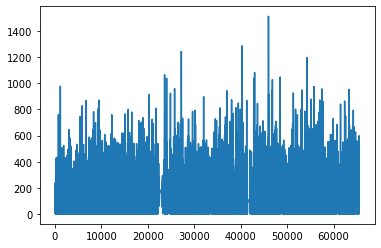

In [30]:
# import seaborn as sns
# sns.displot(df_sorted_result['Length'], hist=False)
from matplotlib import pyplot as plt
plt.plot(df_sorted_result['Length'])
plt.show()

In [31]:
#df_sorted_result.to_csv(Path(os.getcwd() + "/" + "descending_length_tos_data.csv"), index=False)

In [32]:
# 마침표 단위로 문장 자르기.
# 길이 다시 계산 후 길이 열 드랍.
#문장 랜덤 배치(To remove learning bias.)